In [20]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"D:\AI WORKSHOP\TASK\KMEANS,HIERARCHIAL,DBSCAN\CC_GENERAL_preprocessed.csv")

features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS','CREDIT_LIMIT', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT']
df_features = df[features]
for col in ['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']:
    Q1 = df_features[col].quantile(0.25)
    Q3 = df_features[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df_features[col] = np.where(df_features[col] > upper_bound, upper_bound, df_features[col])

robust_scaler = RobustScaler()
df_processed = robust_scaler.fit_transform(df_features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_processed)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])



C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_29984\1072269490.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col] = np.where(df_features[col] > upper_bound, upper_bound, df_features[col])
C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_29984\1072269490.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col] = np.where(df_features[col] > upper_bound, upper_bound, df_features[col])
C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_29984\1072269490.py:17: SettingWithCopyW

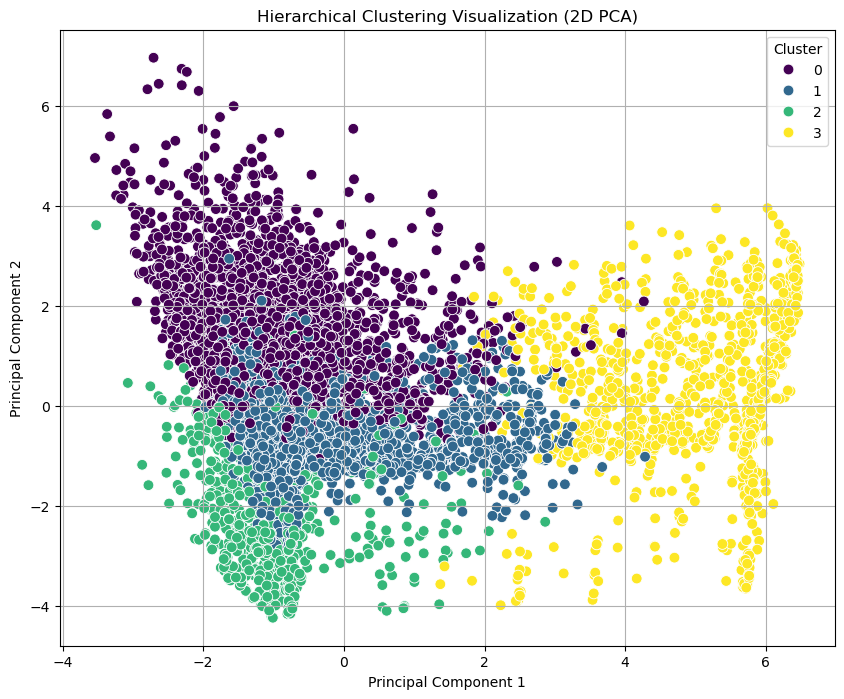

In [19]:
hierarchical_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical_model.fit_predict(df_processed)

pca_df['Hierarchical_Cluster'] = hierarchical_labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=pca_df, palette='viridis', s=60)
plt.title('Hierarchical Clustering Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

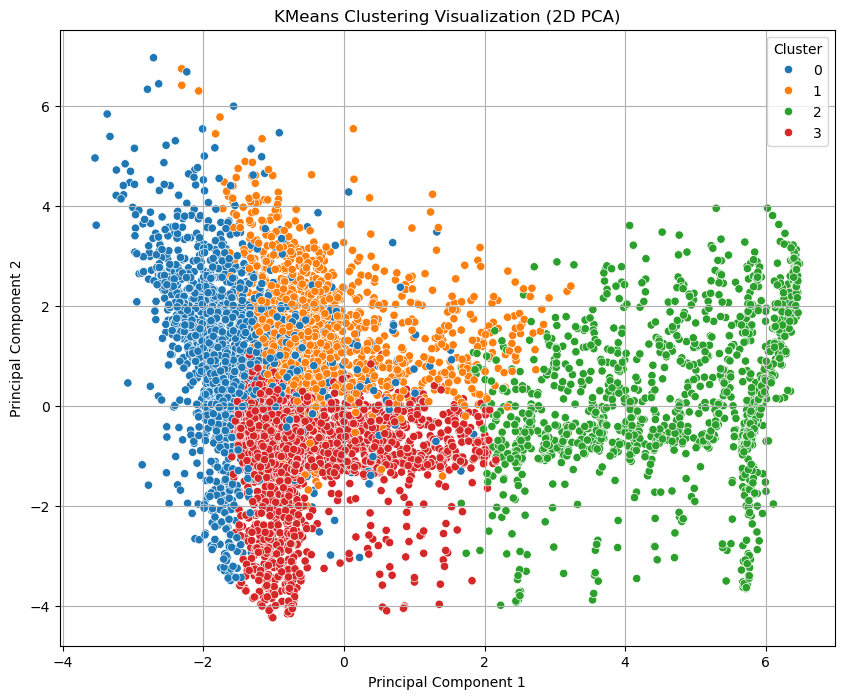

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_processed)
pca_df['KMeans_Cluster'] = kmeans_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='tab10')
plt.title('KMeans Clustering Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


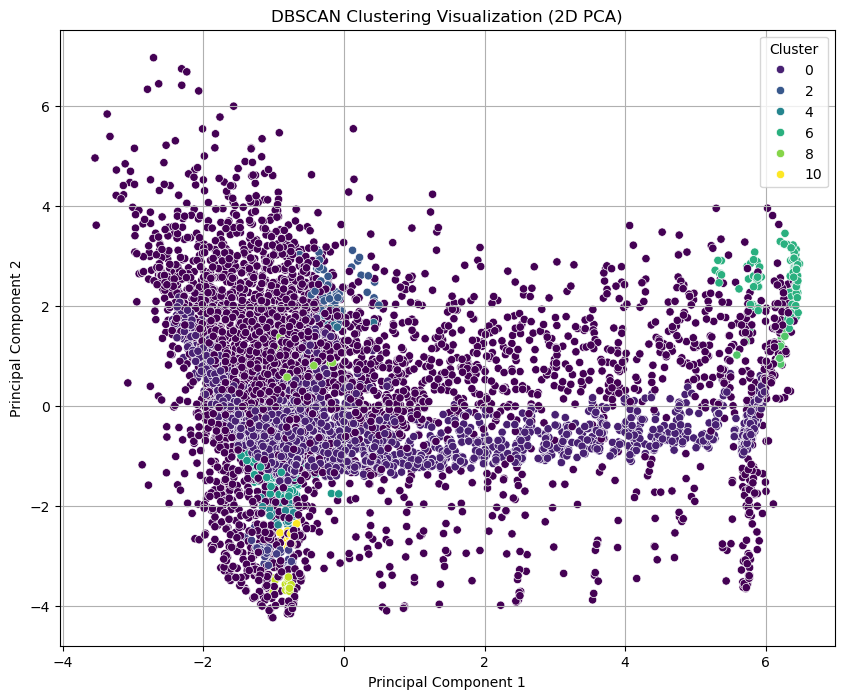

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=2 * len(df_features.columns))
dbscan_labels = dbscan.fit_predict(df_processed)
pca_df['DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_model.fit_predict(df_processed)

hierarchical_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical_model.fit_predict(df_processed)

dbscan_model = DBSCAN(eps=0.8, min_samples=2 * df_processed.shape[1])
dbscan_labels = dbscan_model.fit_predict(df_processed)

models = {
    'K-Means': {'labels': kmeans_labels, 'model': kmeans_model},
    'Hierarchical': {'labels': hierarchical_labels, 'model': hierarchical_model},
    'DBSCAN': {'labels': dbscan_labels, 'model': dbscan_model}
}

In [22]:
results = []

for name, info in models.items():
    labels, model = info['labels'], info['model']
    sil = dbi = chi = inertia = np.nan

    if name == "DBSCAN":
        valid = labels != -1
        if len(np.unique(labels[valid])) >= 2:
            Xv, Lv = df_processed[valid], labels[valid]
            sil, dbi, chi = silhouette_score(Xv, Lv), davies_bouldin_score(Xv, Lv), calinski_harabasz_score(Xv, Lv)
    else:
        sil, dbi, chi = silhouette_score(df_processed, labels), davies_bouldin_score(df_processed, labels), calinski_harabasz_score(df_processed, labels)
        if name == "K-Means": inertia = model.inertia_

    results.append({"Model": name, "Silhouette": sil, "Davies-Bouldin": dbi, "Calinski-Harabasz": chi, "Inertia": inertia})
results_df = pd.DataFrame(results)
results_df.head(3)

,Model,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inertia
0,K-Means,0.288969,1.277045,3196.647436,51147.450921
1,Hierarchical,0.270304,1.483407,3051.054476,NaN
2,DBSCAN,-0.179491,1.226267,184.154254,NaN
